## Attempt to predict the target labels on the test data

### As I have seen throught the attempt_1 jupyter file that the given data is highly unbalanced, it would be wise to use something like 'Downsizing and Upweighting'.                                                                                                              

### I tried to follow the email and not spend more than 6-7 hours on this, but I realize that there are some ways to deal with this kind of highly unbalanced data.        

### My objective was to build a working classifier that could be use as initial baseline prediction. 

### To explain my choices I have placed a few prompts.                                                                                                      I also refer to attempt_1 that I made as my rough file to get started with this challenge.                                       Thank You for giving me this opportunity. I had some fun doing this.

### Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


In [2]:
path = "./data/"
filename_read = os.path.join(path,'train.csv')
data=pd.read_csv(filename_read)

C:\Users\rahil\.julia\conda\3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (16,17,19,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,index,borough,block,lot,schooldist,council,zipcode,firecomp,policeprct,healthcenterdistrict,...,yearalter1,yearalter2,histdist,landmark,builtfar,tract2010,xcoord,ycoord,zonemap,target__office
0,574546,BX,3717,64,8.0,18.0,10472.0,E096,43.0,26.0,...,0,0,NaN,NaN,0.62,48,1018914.0,239801.0,6C,False
1,12600,QN,15818,48,27.0,31.0,11691.0,E264,101.0,45.0,...,0,0,NaN,NaN,0.48,99802,1051073.0,155952.0,31A,False
2,235922,BK,6787,7,22.0,48.0,11229.0,E276,61.0,35.0,...,0,0,NaN,NaN,0.69,548,998378.0,161944.0,23B,False
3,202581,BK,672,30,15.0,38.0,11232.0,E228,72.0,39.0,...,0,0,NaN,NaN,1.24,101,983777.0,178952.0,16B,False
4,155971,BK,6651,7501,21.0,44.0,11223.0,E330,62.0,37.0,...,0,0,NaN,NaN,3.59,426,990141.0,159965.0,22D,False


### The following coulmns have very sparse data. Hence, I am deciding to drop them for my classifier to be a good initial baseline

In [4]:
df=data
df=df.drop('zonedist2',axis=1)
df=df.drop('zonedist3',axis=1)
df=df.drop('zonedist4',axis=1)
df=df.drop('overlay1',axis=1)
df=df.drop('overlay2',axis=1)
df=df.drop('spdist1',axis=1)
df=df.drop('spdist2',axis=1)
df=df.drop('spdist3',axis=1)
df=df.drop('ltdheight',axis=1)
df.shape


(687369, 55)

### Dividing data into training training and validation sets

In [5]:
mask =np.random.rand(len(df))<0.75
TrainDF = pd.DataFrame(df[mask])
validationDF=pd.DataFrame(df[~mask])
print('Size of Training Set is {}'.format(len(TrainDF)))
print('Size of validation Set is {}'.format(len(validationDF)))

Size of Training Set is 515600
Size of validation Set is 171769


### Shuffling data in both sets to form K sets. Trying to use KFold cross validation after creating a baseline classifier first

In [59]:
import sys
from sklearn.model_selection import KFold
kf = KFold(5)

fold = 1
for train_index, validation_index in kf.split(df):
    #print(train_index,validation_index)
    TrainDF = pd.DataFrame(df.ix[train_index])
    ValDF = pd.DataFrame(df.ix[validation_index])
    print('Fold #{}, Training Size {}, Validation Size {}'.format(fold,len(TrainDF),len(ValDF)))
    fold+=1

C:\Users\rahil\.julia\conda\3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\rahil\.julia\conda\3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


Fold #1, Training Size 549895, Validation Size 137474
Fold #2, Training Size 549895, Validation Size 137474
Fold #3, Training Size 549895, Validation Size 137474
Fold #4, Training Size 549895, Validation Size 137474
Fold #5, Training Size 549896, Validation Size 137473


In [7]:
label=df['target__office']
label.describe()

count     687369
unique         2
top        False
freq      681787
Name: target__office, dtype: object

In [8]:
TrainDF=TrainDF.drop('index',axis=1)
TrainDF=TrainDF.drop('landmark',axis=1)
TrainDF=TrainDF.drop('histdist',axis=1)

### Encoding the labels: False = 0, True = 1

In [9]:
from sklearn import preprocessing

def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_

In [10]:
encode_text_index(TrainDF,"target__office")
TrainDF.groupby('target__office').nunique()

,borough,block,lot,schooldist,council,zipcode,firecomp,policeprct,healthcenterdistrict,healtharea,...,exempttot,yearbuilt,yearalter1,yearalter2,builtfar,tract2010,xcoord,ycoord,zonemap,target__office
target__office,,,,,,,,,,,,,,,,,,,,,
0,5,13856,2166,32,51,190,348,77,30,210,...,31087,212,113,66,1785,1326,124284,126808,129,1
1,5,2481,241,32,51,188,336,76,30,195,...,623,136,82,38,1266,839,4254,4281,108,1


#### Counting the number of True values in the dataset

In [11]:
count=0
for i in range(len(TrainDF)):
    if TrainDF['target__office'][i]==1:
        count = count + 1
count

4449

In [24]:
y_train=TrainDF['target__office']
x_train=TrainDF

#### Dropping the label - Target office from the training dataset to avoid data leakage into the classifier

In [25]:
x_train=x_train.drop('target__office',axis=1)
x_train.fillna(0)
x_train.shape

(549896, 51)

In [26]:
x_train.reset_index(inplace=True, drop=True)
x_train.head()

,borough,block,lot,schooldist,council,zipcode,firecomp,policeprct,healthcenterdistrict,healtharea,...,exemptland,exempttot,yearbuilt,yearalter1,yearalter2,builtfar,tract2010,xcoord,ycoord,zonemap
0,BX,3717,64,8.0,18.0,10472.0,E096,43.0,26.0,3020.0,...,0,0,1940,0,0,0.62,48,1018914.0,239801.0,6C
1,QN,15818,48,27.0,31.0,11691.0,E264,101.0,45.0,3800.0,...,0,0,1930,0,0,0.48,99802,1051073.0,155952.0,31A
2,BK,6787,7,22.0,48.0,11229.0,E276,61.0,35.0,7320.0,...,1470,1470,1930,0,0,0.69,548,998378.0,161944.0,23B
3,BK,672,30,15.0,38.0,11232.0,E228,72.0,39.0,4400.0,...,0,0,1910,0,0,1.24,101,983777.0,178952.0,16B
4,BK,6651,7501,21.0,44.0,11223.0,E330,62.0,37.0,8522.0,...,0,356862,2002,0,0,3.59,426,990141.0,159965.0,22D


### Evaluating each column with strings (whether they have some categories or can be ignored from the training data)

#### starting from Borough and working our way through

In [27]:
x_train.groupby('borough').nunique()

,borough,block,lot,schooldist,council,zipcode,firecomp,policeprct,healthcenterdistrict,healtharea,...,exemptland,exempttot,yearbuilt,yearalter1,yearalter2,builtfar,tract2010,xcoord,ycoord,zonemap
borough,,,,,,,,,,,,,,,,,,,,,
BK,1,7411,1377,12,16,40,103,23,10,117,...,10243,12938,192,95,56,845,754,44480,50077,33
BX,1,2968,1576,6,11,26,60,13,7,65,...,3959,6214,140,97,40,717,338,25239,28192,22
MN,1,1908,528,7,10,66,77,26,7,88,...,3799,5958,186,107,51,1962,289,15670,20678,20
QN,1,11883,1113,7,15,63,84,16,6,74,...,11035,11426,141,82,52,707,666,59952,55937,55
SI,1,3975,771,1,3,12,30,4,1,10,...,5263,5129,144,66,32,324,111,36539,37095,25


#### Converting each Borough into a dictionary of integers

In [28]:
boro = {'BK': 1,'BX': 2, 'MN': 3, 'QN': 4, 'SI': 5} 
x_train.borough = [boro[item] for item in x_train.borough]
x_train.head()

,borough,block,lot,schooldist,council,zipcode,firecomp,policeprct,healthcenterdistrict,healtharea,...,exemptland,exempttot,yearbuilt,yearalter1,yearalter2,builtfar,tract2010,xcoord,ycoord,zonemap
0,2,3717,64,8.0,18.0,10472.0,E096,43.0,26.0,3020.0,...,0,0,1940,0,0,0.62,48,1018914.0,239801.0,6C
1,4,15818,48,27.0,31.0,11691.0,E264,101.0,45.0,3800.0,...,0,0,1930,0,0,0.48,99802,1051073.0,155952.0,31A
2,1,6787,7,22.0,48.0,11229.0,E276,61.0,35.0,7320.0,...,1470,1470,1930,0,0,0.69,548,998378.0,161944.0,23B
3,1,672,30,15.0,38.0,11232.0,E228,72.0,39.0,4400.0,...,0,0,1910,0,0,1.24,101,983777.0,178952.0,16B
4,1,6651,7501,21.0,44.0,11223.0,E330,62.0,37.0,8522.0,...,0,356862,2002,0,0,3.59,426,990141.0,159965.0,22D


#### Dropping more features that have strings (taking a chance)

In [29]:
x_train= x_train.drop('firecomp',axis=1)
x_train=x_train.drop('zonemap',axis=1)
x_train=x_train.drop('sanitsub',axis=1)
x_train=x_train.drop('zonedist1',axis=1)
x_train.head()

,borough,block,lot,schooldist,council,zipcode,policeprct,healthcenterdistrict,healtharea,sanitboro,...,assesstot,exemptland,exempttot,yearbuilt,yearalter1,yearalter2,builtfar,tract2010,xcoord,ycoord
0,2,3717,64,8.0,18.0,10472.0,43.0,26.0,3020.0,2.0,...,19280,0,0,1940,0,0,0.62,48,1018914.0,239801.0
1,4,15818,48,27.0,31.0,11691.0,101.0,45.0,3800.0,4.0,...,4178,0,0,1930,0,0,0.48,99802,1051073.0,155952.0
2,1,6787,7,22.0,48.0,11229.0,61.0,35.0,7320.0,3.0,...,57028,1470,1470,1930,0,0,0.69,548,998378.0,161944.0
3,1,672,30,15.0,38.0,11232.0,72.0,39.0,4400.0,3.0,...,20242,0,0,1910,0,0,1.24,101,983777.0,178952.0
4,1,6651,7501,21.0,44.0,11223.0,62.0,37.0,8522.0,6.0,...,1368456,0,356862,2002,0,0,3.59,426,990141.0,159965.0


#### Also dropping some 'na' values

In [30]:
split = {'N': 1,'Y': 2} 
x_train=x_train.dropna(axis=0)
x_train.splitzone = [split[item] for item in x_train.splitzone]
x_train.head()

,borough,block,lot,schooldist,council,zipcode,policeprct,healthcenterdistrict,healtharea,sanitboro,...,assesstot,exemptland,exempttot,yearbuilt,yearalter1,yearalter2,builtfar,tract2010,xcoord,ycoord
0,2,3717,64,8.0,18.0,10472.0,43.0,26.0,3020.0,2.0,...,19280,0,0,1940,0,0,0.62,48,1018914.0,239801.0
5,4,1583,151,24.0,25.0,11373.0,110.0,42.0,1420.0,4.0,...,149146,0,0,1968,0,0,1.52,471,1018443.0,209795.0
8,2,5521,85,8.0,13.0,10465.0,45.0,26.0,3220.0,2.0,...,26064,0,0,1930,0,0,0.41,118,1037553.0,236606.0
9,2,5767,791,10.0,11.0,10463.0,50.0,21.0,200.0,2.0,...,31472,0,0,1940,0,0,0.88,285,1011053.0,261816.0
12,4,3723,63,24.0,30.0,11385.0,104.0,46.0,2400.0,4.0,...,27072,0,0,1920,0,0,0.89,567,1014866.0,193419.0


In [31]:
x_train.shape

(224030, 47)

In [32]:
x_train.groupby('ext').nunique()

,borough,block,lot,schooldist,council,zipcode,policeprct,healthcenterdistrict,healtharea,sanitboro,...,assesstot,exemptland,exempttot,yearbuilt,yearalter1,yearalter2,builtfar,tract2010,xcoord,ycoord
ext,,,,,,,,,,,,,,,,,,,,,
E,5,8138,575,32,51,174,77,30,205,6,...,14268,2066,2472,175,92,51,850,1220,25543,26145
EG,5,7543,528,30,50,146,68,29,186,5,...,7775,1523,1320,125,54,37,313,1034,19954,19935
G,5,12129,1136,32,51,158,73,30,195,6,...,19113,8101,6633,139,65,34,477,1189,85286,82951


In [33]:
ext = {'E': 1,'EG': 2, 'G' : 3} 
x_train.ext = [ext[item] for item in x_train.ext]
x_train.head()

,borough,block,lot,schooldist,council,zipcode,policeprct,healthcenterdistrict,healtharea,sanitboro,...,assesstot,exemptland,exempttot,yearbuilt,yearalter1,yearalter2,builtfar,tract2010,xcoord,ycoord
0,2,3717,64,8.0,18.0,10472.0,43.0,26.0,3020.0,2.0,...,19280,0,0,1940,0,0,0.62,48,1018914.0,239801.0
5,4,1583,151,24.0,25.0,11373.0,110.0,42.0,1420.0,4.0,...,149146,0,0,1968,0,0,1.52,471,1018443.0,209795.0
8,2,5521,85,8.0,13.0,10465.0,45.0,26.0,3220.0,2.0,...,26064,0,0,1930,0,0,0.41,118,1037553.0,236606.0
9,2,5767,791,10.0,11.0,10463.0,50.0,21.0,200.0,2.0,...,31472,0,0,1940,0,0,0.88,285,1011053.0,261816.0
12,4,3723,63,24.0,30.0,11385.0,104.0,46.0,2400.0,4.0,...,27072,0,0,1920,0,0,0.89,567,1014866.0,193419.0


In [34]:
x_train.groupby('irrlotcode').nunique()

,borough,block,lot,schooldist,council,zipcode,policeprct,healthcenterdistrict,healtharea,sanitboro,...,assesstot,exemptland,exempttot,yearbuilt,yearalter1,yearalter2,builtfar,tract2010,xcoord,ycoord
irrlotcode,,,,,,,,,,,,,,,,,,,,,
N,5,12519,1183,32,51,171,77,30,205,6,...,26147,8886,7671,171,91,48,789,1247,90822,87469
Y,5,7612,647,32,51,172,76,30,204,6,...,10428,2110,2204,155,79,42,641,1164,23112,22969


In [35]:
lot = {'N': 1,'Y': 2} 
x_train.irrlotcode = [lot[item] for item in x_train.irrlotcode]
x_train.head()

,borough,block,lot,schooldist,council,zipcode,policeprct,healthcenterdistrict,healtharea,sanitboro,...,assesstot,exemptland,exempttot,yearbuilt,yearalter1,yearalter2,builtfar,tract2010,xcoord,ycoord
0,2,3717,64,8.0,18.0,10472.0,43.0,26.0,3020.0,2.0,...,19280,0,0,1940,0,0,0.62,48,1018914.0,239801.0
5,4,1583,151,24.0,25.0,11373.0,110.0,42.0,1420.0,4.0,...,149146,0,0,1968,0,0,1.52,471,1018443.0,209795.0
8,2,5521,85,8.0,13.0,10465.0,45.0,26.0,3220.0,2.0,...,26064,0,0,1930,0,0,0.41,118,1037553.0,236606.0
9,2,5767,791,10.0,11.0,10463.0,50.0,21.0,200.0,2.0,...,31472,0,0,1940,0,0,0.88,285,1011053.0,261816.0
12,4,3723,63,24.0,30.0,11385.0,104.0,46.0,2400.0,4.0,...,27072,0,0,1920,0,0,0.89,567,1014866.0,193419.0


### I know I am losing data but for a baseline classifier training, I am trying to clean as much data as possible

In [38]:
x_train.shape

(224030, 47)

#### Choosing patches of data (from Training set) to train the classifier and check it's accuracy

In [41]:
x=x_train[:160000]
y=y_train[:160000]
x_test=x_train[-15000:]
y_test=y_train[-15000:]

#### Using gradient Boosting classifier (selected as the best one in time and accuracy through attempt_1)

In [42]:
from sklearn.ensemble import GradientBoostingClassifier  

gb = GradientBoostingClassifier()
gb.fit(x, y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [44]:
from sklearn.model_selection import  cross_val_score

c_gb = cross_val_score(gb, x, y, cv=10)
c_gb.mean()

0.9909062519460694

In [46]:
from sklearn import metrics

pred_3=gb.predict(x_test)
score=np.sqrt(metrics.mean_squared_error(pred_3,y_test))

print("Loss in (RMSE): {}".format(score))
print('Accuracy is {}'.format(c_gb.mean()))

Loss in (RMSE): 0.08981462390204986
Accuracy is 0.9909062519460694


#### Checking the features with most importance 

In [47]:
dec_fea = pd.DataFrame(gb.feature_importances_)
dec_fea["name"] = list(x) 
dec_fea.sort_values(by=0, ascending=False).head()

,0,name
46,0.152538,ycoord
45,0.116975,xcoord
37,0.092804,assesstot
39,0.074268,exempttot
15,0.055956,bldgarea


In [49]:
dec_fea.sort_values(by=0, ascending=False)

,0,name
46,0.152538,ycoord
45,0.116975,xcoord
37,0.092804,assesstot
39,0.074268,exempttot
15,0.055956,bldgarea
19,0.044304,retailarea
36,0.044161,assessland
2,0.041690,lot
14,0.032853,lotarea
43,0.031586,builtfar


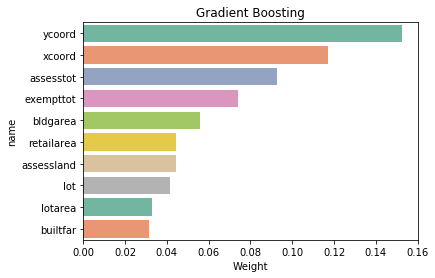

In [52]:
import seaborn as sns

g = sns.barplot(0,"name",data = dec_fea.sort_values(by=0, ascending=False)[0:10], palette="Set2",orient = "h")
g.set_xlabel("Weight")
g = g.set_title("Gradient Boosting")

## Now as the classifier is trained, let us use the validation set to predict it's labels

#### We do similar feature engineering as in the training data to ready the Validation set for prediction

In [60]:
ValDF=ValDF.drop('index',axis=1)
ValDF=ValDF.drop('landmark',axis=1)
ValDF=ValDF.drop('histdist',axis=1)
#y_val=ValDF['target__office']
x_val=ValDF
#x_val=x_val.drop('target__office',axis=1)
x_val.fillna(0)
x_val.reset_index(inplace=True, drop=True)
x_val.head()

,borough,block,lot,schooldist,council,zipcode,firecomp,policeprct,healthcenterdistrict,healtharea,...,exempttot,yearbuilt,yearalter1,yearalter2,builtfar,tract2010,xcoord,ycoord,zonemap,target__office
0,SI,7863,205,31.0,51.0,10307.0,E151,123.0,51.0,800.0,...,1470,1996,0,0,2.29,24402,918068.0,122931.0,35A,False
1,QN,3794,45,24.0,30.0,11379.0,E319,104.0,46.0,1810.0,...,0,1935,0,0,0.82,619,1018832.0,197227.0,13D,False
2,BK,5242,5,22.0,45.0,11210.0,E281,70.0,35.0,7220.0,...,1470,1910,0,0,0.38,766,996369.0,170011.0,23A,False
3,BX,2601,65,7.0,8.0,10455.0,L029,40.0,23.0,4100.0,...,0,1931,0,0,1.94,31,1010569.0,234003.0,6C,False
4,BK,4407,30,19.0,42.0,11208.0,L107,75.0,33.0,6420.0,...,0,1959,0,0,1.00,1078,1019183.0,179835.0,17D,False


In [61]:
boro = {'BK': 1,'BX': 2, 'MN': 3, 'QN': 4, 'SI': 5} 
x_val.borough = [boro[item] for item in x_val.borough]
x_val= x_val.drop('firecomp',axis=1)
x_val=x_val.drop('zonemap',axis=1)
x_val=x_val.drop('sanitsub',axis=1)
x_val=x_val.drop('zonedist1',axis=1)

split = {'N': 1,'Y': 2} 
x_val=x_val.dropna(axis=0)
x_val.splitzone = [split[item] for item in x_val.splitzone]
x_val.head()

,borough,block,lot,schooldist,council,zipcode,policeprct,healthcenterdistrict,healtharea,sanitboro,...,exemptland,exempttot,yearbuilt,yearalter1,yearalter2,builtfar,tract2010,xcoord,ycoord,target__office
1,4,3794,45,24.0,30.0,11379.0,104.0,46.0,1810.0,4.0,...,0,0,1935,0,0,0.82,619,1018832.0,197227.0,False
2,1,5242,5,22.0,45.0,11210.0,70.0,35.0,7220.0,3.0,...,1470,1470,1910,0,0,0.38,766,996369.0,170011.0,False
5,4,5616,58,26.0,20.0,11358.0,111.0,43.0,2121.0,4.0,...,1470,1470,1945,0,0,0.88,1429,1044377.0,213138.0,False
7,1,2468,7501,14.0,33.0,11249.0,90.0,30.0,500.0,2.0,...,1688241,17549751,2010,2010,0,3.52,549,993154.0,198433.0,False
11,4,11443,54,27.0,32.0,11414.0,106.0,45.0,3000.0,4.0,...,1470,1470,1960,0,0,0.58,6202,1025106.0,181691.0,False


In [62]:
ext = {'E': 1,'EG': 2, 'G' : 3} 
x_val.ext = [ext[item] for item in x_val.ext]

lot = {'N': 1,'Y': 2} 
x_val.irrlotcode = [lot[item] for item in x_val.irrlotcode]
x_val.head()

,borough,block,lot,schooldist,council,zipcode,policeprct,healthcenterdistrict,healtharea,sanitboro,...,exemptland,exempttot,yearbuilt,yearalter1,yearalter2,builtfar,tract2010,xcoord,ycoord,target__office
1,4,3794,45,24.0,30.0,11379.0,104.0,46.0,1810.0,4.0,...,0,0,1935,0,0,0.82,619,1018832.0,197227.0,False
2,1,5242,5,22.0,45.0,11210.0,70.0,35.0,7220.0,3.0,...,1470,1470,1910,0,0,0.38,766,996369.0,170011.0,False
5,4,5616,58,26.0,20.0,11358.0,111.0,43.0,2121.0,4.0,...,1470,1470,1945,0,0,0.88,1429,1044377.0,213138.0,False
7,1,2468,7501,14.0,33.0,11249.0,90.0,30.0,500.0,2.0,...,1688241,17549751,2010,2010,0,3.52,549,993154.0,198433.0,False
11,4,11443,54,27.0,32.0,11414.0,106.0,45.0,3000.0,4.0,...,1470,1470,1960,0,0,0.58,6202,1025106.0,181691.0,False


In [63]:
y_val=x_val['target__office']
x_val=x_val.drop('target__office',axis=1)

In [64]:
pred_val=gb.predict(x_val)
score=np.sqrt(metrics.mean_squared_error(pred_val,y_val))

print("Loss in (RMSE): {}".format(score))


Loss in (RMSE): 0.0754466170940166


In [65]:
score = metrics.accuracy_score(y_val, pred_val)
print("Accuracy score: {}".format(score))

Accuracy score: 0.9943078079690688


## Now we take the Test data that has no labels. 

### We do the same feature engineering. We create a array of Predicted labels and store it in a new data set cloning the Test set

In [84]:
path = "./data/"
filename_read = os.path.join(path,'test.csv')
data=pd.read_csv(filename_read)



C:\Users\rahil\.julia\conda\3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (17,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [67]:
df=data
df=df.drop('zonedist2',axis=1)
df=df.drop('zonedist3',axis=1)
df=df.drop('zonedist4',axis=1)
df=df.drop('overlay1',axis=1)
df=df.drop('overlay2',axis=1)
df=df.drop('spdist1',axis=1)
df=df.drop('spdist2',axis=1)
df=df.drop('spdist3',axis=1)
df=df.drop('ltdheight',axis=1)
df.shape

(171843, 54)

In [72]:
TestDF = pd.DataFrame(df)
TestDF.head()

,index,borough,block,lot,schooldist,council,zipcode,firecomp,policeprct,healthcenterdistrict,...,yearbuilt,yearalter1,yearalter2,histdist,landmark,builtfar,tract2010,xcoord,ycoord,zonemap
0,432027,BK,3361,34,32.0,37.0,11221.0,L112,83.0,34.0,...,1931,2015,0,NaN,NaN,1.94,435,1008377.0,192685.0,13B
1,97433,QN,654,17,30.0,22.0,11103.0,L117,114.0,41.0,...,1931,0,0,NaN,NaN,1.34,143,1008289.0,218741.0,9A
2,408327,QN,3811,12,24.0,30.0,11385.0,E319,104.0,46.0,...,1925,0,0,NaN,NaN,0.67,63301,1018637.0,196297.0,13D
3,365188,QN,10988,17,29.0,27.0,11412.0,L150,113.0,44.0,...,1920,0,0,NaN,NaN,0.61,526,1050330.0,193922.0,15B
4,856787,BK,2619,36,14.0,33.0,11222.0,L106,94.0,30.0,...,1899,0,0,NaN,NaN,1.72,561,997418.0,203572.0,13A


In [73]:
TestDF=TestDF.drop('index',axis=1)
TestDF=TestDF.drop('landmark',axis=1)
TestDF=TestDF.drop('histdist',axis=1)
x_test=TestDF

x_test.fillna(0)
x_test.reset_index(inplace=True, drop=True)
x_test.head()

,borough,block,lot,schooldist,council,zipcode,firecomp,policeprct,healthcenterdistrict,healtharea,...,exemptland,exempttot,yearbuilt,yearalter1,yearalter2,builtfar,tract2010,xcoord,ycoord,zonemap
0,BK,3361,34,32.0,37.0,11221.0,L112,83.0,34.0,3400.0,...,0,0,1931,2015,0,1.94,435,1008377.0,192685.0,13B
1,QN,654,17,30.0,22.0,11103.0,L117,114.0,41.0,510.0,...,0,0,1931,0,0,1.34,143,1008289.0,218741.0,9A
2,QN,3811,12,24.0,30.0,11385.0,E319,104.0,46.0,1810.0,...,1470,1470,1925,0,0,0.67,63301,1018637.0,196297.0,13D
3,QN,10988,17,29.0,27.0,11412.0,L150,113.0,44.0,3520.0,...,0,0,1920,0,0,0.61,526,1050330.0,193922.0,15B
4,BK,2619,36,14.0,33.0,11222.0,L106,94.0,30.0,100.0,...,0,0,1899,0,0,1.72,561,997418.0,203572.0,13A


In [74]:
boro = {'BK': 1,'BX': 2, 'MN': 3, 'QN': 4, 'SI': 5} 
x_test.borough = [boro[item] for item in x_test.borough]
x_test= x_test.drop('firecomp',axis=1)
x_test=x_test.drop('zonemap',axis=1)
x_test=x_test.drop('sanitsub',axis=1)
x_test=x_test.drop('zonedist1',axis=1)

split = {'N': 1,'Y': 2} 
x_test=x_test.dropna(axis=0)
x_test.splitzone = [split[item] for item in x_test.splitzone]
x_test.head()

,borough,block,lot,schooldist,council,zipcode,policeprct,healthcenterdistrict,healtharea,sanitboro,...,assesstot,exemptland,exempttot,yearbuilt,yearalter1,yearalter2,builtfar,tract2010,xcoord,ycoord
2,4,3811,12,24.0,30.0,11385.0,104.0,46.0,1810.0,4.0,...,24004,1470,1470,1925,0,0,0.67,63301,1018637.0,196297.0
3,4,10988,17,29.0,27.0,11412.0,113.0,44.0,3520.0,4.0,...,21626,0,0,1920,0,0,0.61,526,1050330.0,193922.0
5,3,874,16,2.0,2.0,10003.0,13.0,14.0,5300.0,1.0,...,1304100,0,0,1920,0,0,3.78,50,987814.0,207663.0
6,4,3566,3,24.0,34.0,11385.0,104.0,46.0,2300.0,4.0,...,29692,0,0,1920,0,0,0.97,557,1011831.0,193250.0
8,4,10155,4,28.0,27.0,11432.0,103.0,44.0,3510.0,4.0,...,1133550,0,0,1921,0,0,1.60,444,1041262.0,196339.0


In [75]:
ext = {'E': 1,'EG': 2, 'G' : 3} 
x_test.ext = [ext[item] for item in x_test.ext]

lot = {'N': 1,'Y': 2} 
x_test.irrlotcode = [lot[item] for item in x_test.irrlotcode]
x_test.head()

,borough,block,lot,schooldist,council,zipcode,policeprct,healthcenterdistrict,healtharea,sanitboro,...,assesstot,exemptland,exempttot,yearbuilt,yearalter1,yearalter2,builtfar,tract2010,xcoord,ycoord
2,4,3811,12,24.0,30.0,11385.0,104.0,46.0,1810.0,4.0,...,24004,1470,1470,1925,0,0,0.67,63301,1018637.0,196297.0
3,4,10988,17,29.0,27.0,11412.0,113.0,44.0,3520.0,4.0,...,21626,0,0,1920,0,0,0.61,526,1050330.0,193922.0
5,3,874,16,2.0,2.0,10003.0,13.0,14.0,5300.0,1.0,...,1304100,0,0,1920,0,0,3.78,50,987814.0,207663.0
6,4,3566,3,24.0,34.0,11385.0,104.0,46.0,2300.0,4.0,...,29692,0,0,1920,0,0,0.97,557,1011831.0,193250.0
8,4,10155,4,28.0,27.0,11432.0,103.0,44.0,3510.0,4.0,...,1133550,0,0,1921,0,0,1.60,444,1041262.0,196339.0


In [77]:
pred_test=gb.predict(x_test)

In [78]:
count=0
for i in range(len(pred_test)):
    if pred_test[i]==1:
        count=count+1
count

56

### We received only 56 True cases out of 70154 total test case data points

In [79]:
len(pred_test)

70154

In [80]:
x_test.shape

(70154, 47)

In [81]:
Prediction=pd.DataFrame(pred_test)
x_test=x_test.append(Prediction)
x_test.head()

C:\Users\rahil\.julia\conda\3\lib\site-packages\pandas\core\indexes\api.py:107: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)


,borough,block,lot,schooldist,council,zipcode,policeprct,healthcenterdistrict,healtharea,sanitboro,...,exemptland,exempttot,yearbuilt,yearalter1,yearalter2,builtfar,tract2010,xcoord,ycoord,0
2,4.0,3811.0,12.0,24.0,30.0,11385.0,104.0,46.0,1810.0,4.0,...,1470.0,1470.0,1925.0,0.0,0.0,0.67,63301.0,1018637.0,196297.0,NaN
3,4.0,10988.0,17.0,29.0,27.0,11412.0,113.0,44.0,3520.0,4.0,...,0.0,0.0,1920.0,0.0,0.0,0.61,526.0,1050330.0,193922.0,NaN
5,3.0,874.0,16.0,2.0,2.0,10003.0,13.0,14.0,5300.0,1.0,...,0.0,0.0,1920.0,0.0,0.0,3.78,50.0,987814.0,207663.0,NaN
6,4.0,3566.0,3.0,24.0,34.0,11385.0,104.0,46.0,2300.0,4.0,...,0.0,0.0,1920.0,0.0,0.0,0.97,557.0,1011831.0,193250.0,NaN
8,4.0,10155.0,4.0,28.0,27.0,11432.0,103.0,44.0,3510.0,4.0,...,0.0,0.0,1921.0,0.0,0.0,1.60,444.0,1041262.0,196339.0,NaN


In [82]:
x_test.shape

(140308, 48)

#### The minor problem is that the predicted labels are being appended below the entire data set . I think a better way could be horizontal concatenation, but for now I will just use excel to put them in place. Now we save the test data with predicted labels as, "Test_Prediction.csv"

In [83]:
filename_write = os.path.join(path,"Test_Prediction.csv")
x_test.to_csv(filename_write,index=False)

### I realized indexes are important in this case (to id the building) and cannot be dropped. Hence I am submitting a new file with indexes.